In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [35]:
import pandas as pd

In [44]:
def count():

    landmarks_path = '/vagrant/imgs/list_attr_celeba.csv'
    df = pd.read_csv(landmarks_path)
    headers = list(df)
    output = {}
    for header in headers:
        if header != 'image_id':
            output[header] = {
                0: df[header].value_counts()[-1],
                1: df[header].value_counts()[1]
            }
        
                
    return output

In [45]:
output = count()

In [46]:
print([output[k][1] for k in output])

[103833, 64744, 11663, 156734, 41446, 16163, 84434, 8701, 8417, 30709, 169158, 48472, 28803, 9818, 97669, 11449, 54090, 92189, 13315, 8499, 9459, 23329, 57567, 13193, 14732, 47516, 29983, 41572, 10312, 22516, 12716, 97942, 24913, 78390, 42222, 48785, 95715, 4547, 38276, 56210]


In [47]:
print([output[k][0] for k in output])

[98766, 137855, 190936, 45865, 161153, 186436, 118165, 193898, 194182, 171890, 33441, 154127, 173796, 192781, 104930, 191150, 148509, 110410, 189284, 194100, 193140, 179270, 145032, 189406, 187867, 155083, 172616, 161027, 192287, 180083, 189883, 104657, 177686, 124209, 160377, 153814, 106884, 198052, 164323, 146389]


In [48]:
print([k for k in output])

['Attractive', 'Wavy_Hair', 'Chubby', 'Young', 'Bags_Under_Eyes', 'Receding_Hairline', 'Male', 'Pale_Skin', 'Mustache', 'Bangs', 'No_Beard', 'Black_Hair', 'Bushy_Eyebrows', 'Wearing_Hat', 'Smiling', 'Sideburns', 'Arched_Eyebrows', 'High_Cheekbones', 'Rosy_Cheeks', 'Gray_Hair', 'Double_Chin', 'Narrow_Eyes', 'Oval_Face', 'Eyeglasses', 'Wearing_Necktie', 'Big_Nose', 'Blond_Hair', 'Brown_Hair', 'Blurry', '5_o_Clock_Shadow', 'Goatee', 'Mouth_Slightly_Open', 'Wearing_Necklace', 'Heavy_Makeup', 'Straight_Hair', 'Big_Lips', 'Wearing_Lipstick', 'Bald', 'Wearing_Earrings', 'Pointy_Nose']


In [49]:
import matplotlib.pyplot as plt

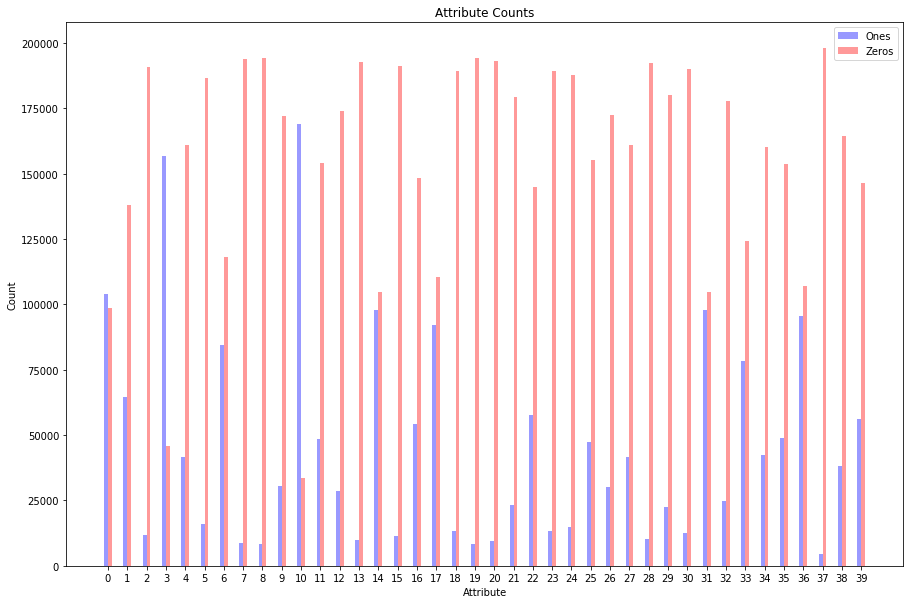

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple


n_groups = len(output)

ones = tuple([output[k][1] for k in output])
# std_men = (2, 3, 4, 1, 2)

zeros = tuple([output[k][0] for k in output])
# std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots(figsize=(15,10))

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, ones, bar_width,
                alpha=opacity, color='b',
                label='Ones')

rects2 = ax.bar(index + bar_width, zeros, bar_width,
                alpha=opacity, color='r',
                label='Zeros')

ax.set_xlabel('Attribute')
ax.set_ylabel('Count')
ax.set_title('Attribute Counts')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(tuple(range(len(output.keys()))))
ax.legend()

# fig.tight_layout()
plt.show()

In [99]:
import numpy as np
import random

In [121]:
ones = np.array(ones, dtype=int)
ones

array([103833,  64744,  11663, 156734,  41446,  16163,  84434,   8701,
         8417,  30709, 169158,  48472,  28803,   9818,  97669,  11449,
        54090,  92189,  13315,   8499,   9459,  23329,  57567,  13193,
        14732,  47516,  29983,  41572,  10312,  22516,  12716,  97942,
        24913,  78390,  42222,  48785,  95715,   4547,  38276,  56210])

In [122]:
zeros = np.array(zeros, dtype=int)

In [123]:
ones_args = np.argsort(ones)
zeros_args = np.argsort(zeros)

In [124]:
lowest_ones = ones_args[:5]
highest_ones = one_args[35:]
lowest_zeros = zeros_args[:5]
highest_zeros = zeros_args[35:]
lowest_zeros
zeros

array([ 98766, 137855, 190936,  45865, 161153, 186436, 118165, 193898,
       194182, 171890,  33441, 154127, 173796, 192781, 104930, 191150,
       148509, 110410, 189284, 194100, 193140, 179270, 145032, 189406,
       187867, 155083, 172616, 161027, 192287, 180083, 189883, 104657,
       177686, 124209, 160377, 153814, 106884, 198052, 164323, 146389])

In [125]:
keys =list(output.keys())
lowest_ones_keys = [keys[i] for i in lowest_ones]
highest_ones_keys = [keys[i] for i in highest_ones]
lowest_zeros_keys = [keys[i] for i in lowest_zeros]
highest_zeros_keys = [keys[i] for i in highest_zeros]

In [126]:
ones[lowest_ones]

array([4547, 8417, 8499, 8701, 9459])

In [127]:
def plot_attributes(ones_, zeros_, keys_, rotation='horizontal'):
    n_groups = len(ones_)

    ones = tuple(ones_)
    # std_men = (2, 3, 4, 1, 2)

    zeros = tuple(zeros_)
    # std_women = (3, 5, 2, 3, 3)

    fig, ax = plt.subplots(figsize=(15,10))

    index = np.arange(n_groups)
    bar_width = 0.2

    opacity = 0.4
    error_config = {'ecolor': '0.3'}

    rects1 = ax.bar(index, ones, bar_width,
                    alpha=opacity, color='b',
                    label='Ones')

    rects2 = ax.bar(index + bar_width, zeros, bar_width,
                    alpha=opacity, color='r',
                    label='Zeros')

    ax.set_xlabel('Attribute')
    ax.set_ylabel('Count')
    ax.set_title('Attribute Counts')
    ax.set_xticks(index + bar_width / 2)
    
    ax.set_xticklabels(tuple(keys_), rotation=rotation)
    ax.legend()

    # fig.tight_layout()
    plt.show()

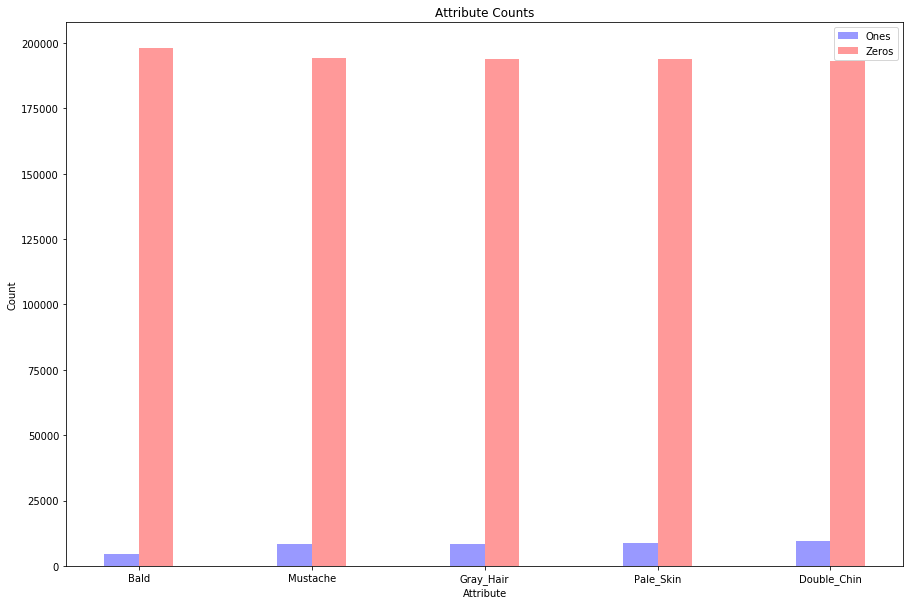

In [128]:
plot_attributes(ones[lowest_ones], zeros[lowest_ones], lowest_ones_keys)

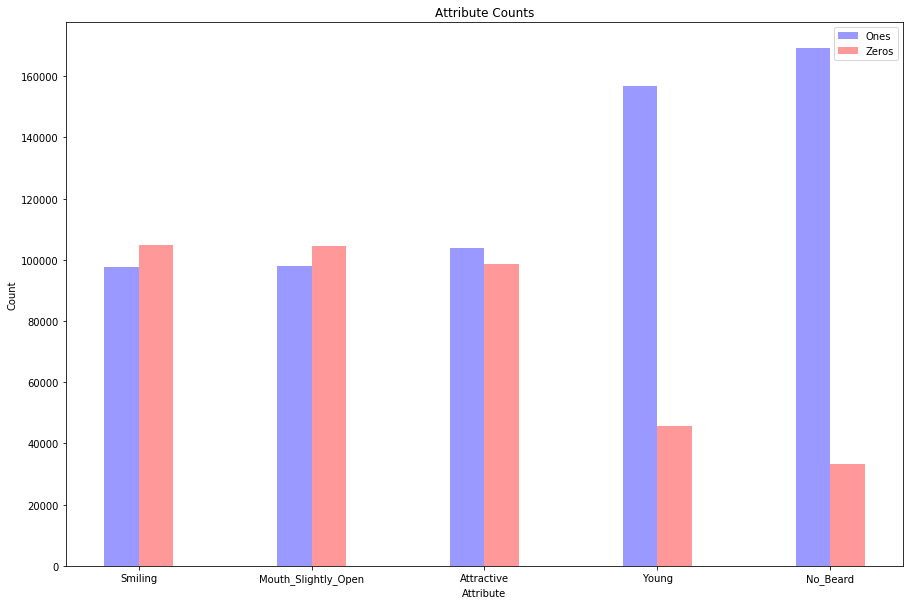

In [112]:
plot_attributes(ones[highest_ones], zeros[highest_ones], highest_ones_keys)

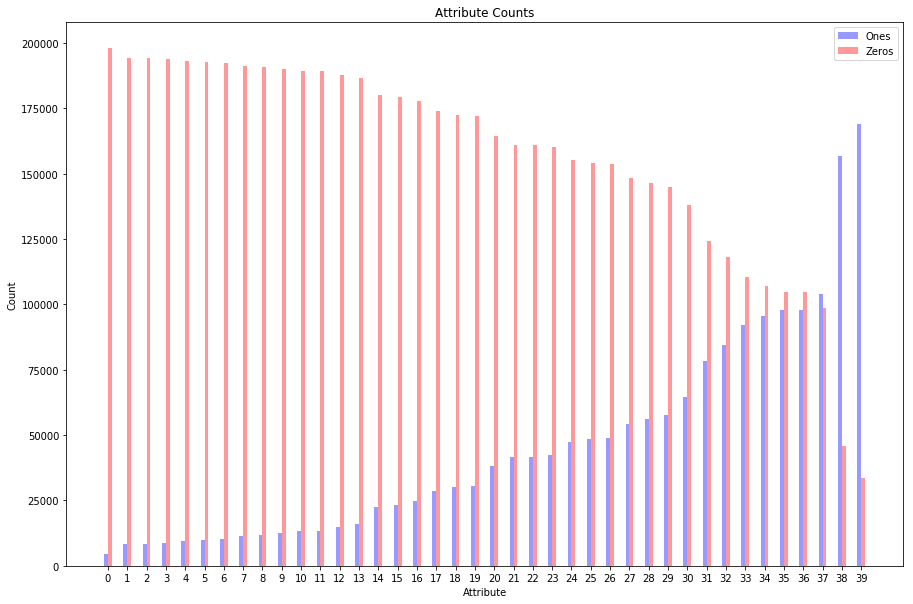

In [115]:


plot_attributes(ones[ones_args], zeros[ones_args], range(len(output.keys())))

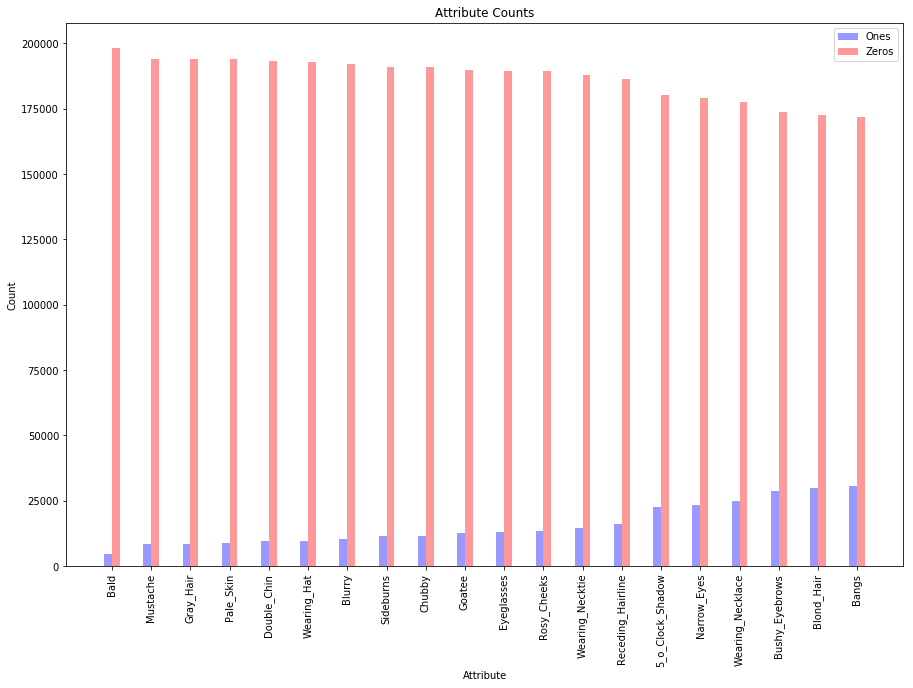

In [129]:
lowest_ones = ones_args[:20]
lowest_ones_keys = [keys[i] for i in lowest_ones]
plot_attributes(ones[lowest_ones], zeros[lowest_ones], lowest_ones_keys, 'vertical')